In [1]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
import folium
import numpy as np
from scipy import ndimage
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = 8, 6

In [2]:
pts = gpd.GeoDataFrame.from_file('ETH_adm3.shp')

<AxesSubplot:>

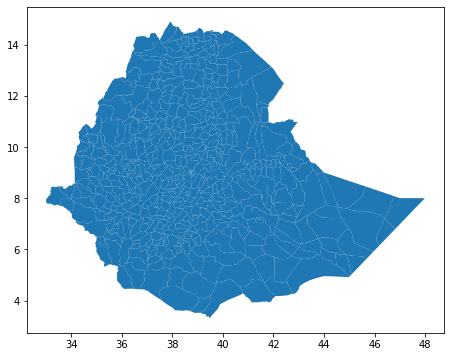

In [3]:

pts.plot()

In [154]:
googleSheetId = '1s4ltAOL0s_qpM6NZLPQdeXbJHZYH_U352lSYEpHDx8k'

workSheetName = 'lat_long_man'

url = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId, 
    workSheetName
)

df = pd.read_csv(url)

df.dropna(axis='columns', how='all', inplace=True)

pd.set_option('display.max_rows', 127)


In [155]:
df

,Manuscripts,Latitude,Longitude
0,2,8.86824,38.79112
1,8,8.98530,38.71711
2,1,9.00456,38.75369
3,2,9.01039,38.73706
4,3,9.01059,38.77560
5,1,9.02862,38.70371
6,1,9.03679,38.76187
7,6,9.04673,38.75800
8,4,9.05327,38.72335
9,1,9.05344,38.71515


In [140]:
geo_df = gpd.GeoDataFrame(df, geometry= gpd.points_from_xy(df.Longitude, df.Latitude))

In [142]:
geo_df

,Manuscripts,Latitude,Longitude,geometry
0,2,8.86824,38.79112,POINT (38.79112 8.86824)
1,8,8.98530,38.71711,POINT (38.71711 8.98530)
2,1,9.00456,38.75369,POINT (38.75369 9.00456)
3,2,9.01039,38.73706,POINT (38.73706 9.01039)
4,3,9.01059,38.77560,POINT (38.77560 9.01059)
5,1,9.02862,38.70371,POINT (38.70371 9.02862)
6,1,9.03679,38.76187,POINT (38.76187 9.03679)
7,6,9.04673,38.75800,POINT (38.75800 9.04673)
8,4,9.05327,38.72335,POINT (38.72335 9.05327)
9,1,9.05344,38.71515,POINT (38.71515 9.05344)


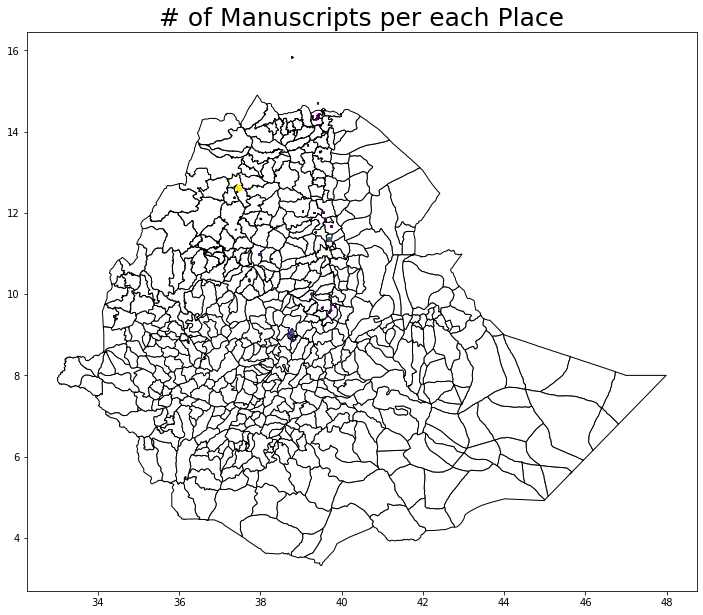

In [152]:
eth = gpd.GeoDataFrame.from_file('ETH_adm3.shp')
variable = 'Manuscripts'
ax = eth.plot(figsize=(12,12), facecolor='#ffffff', edgecolor='#000000')
ax.set_title('# of Manuscripts per each Place', fontdict={'fontsize': '25', 'fontweight' : '3'})
for (idex, row) in geo_df.iterrows():
    geo_df.plot(column=variable, linewidth=0.7, ax=ax, markersize=variable)

In [97]:
geo_df

,Collection,Century,Place,Region,Latitude,Longitude,geometry
0,EMML (HMML),20,"Savior of the World (Madhane Alam), Church of","South: Addis Ababa, Qarānyo/Aqāqi",8.86824,38.79112,POINT (38.79112 8.86824)
1,EMML (HMML),17,"Savior of the World (Madhane Alam), Church of ...","South: Addis Ababa, Qarānyo/Aqāqi",8.86824,38.79112,POINT (38.79112 8.86824)
2,EMML (HMML),16,Private library of Walga Mefrratu,"South: Addis Ababa, Takla Haymanot quarter",8.98530,38.71711,POINT (38.71711 8.98530)
3,EMML (HMML),20,Bookseller,"South: Addis Ababa, Takla Haymanot quarter",8.98530,38.71711,POINT (38.71711 8.98530)
4,EMML (HMML),20,St. Takla Haymanot Church,"South: Addis Ababa, Takla Haymanot quarter",8.98530,38.71711,POINT (38.71711 8.98530)
5,EMML (HMML),17,"Unidentified library, presumably a bookseller,","South: Addis Ababa, Takla Haymanot quarter",8.98530,38.71711,POINT (38.71711 8.98530)
6,EMML (HMML),19,Bookseller Ayele,"South: Addis Ababa, Takla Haymanot quarter",8.98530,38.71711,POINT (38.71711 8.98530)
7,EMML (HMML),20,"Apostles (Hawariat), Church of","South: Addis Ababa, Takla Haymanot quarter",8.98530,38.71711,POINT (38.71711 8.98530)
8,EMML (HMML),18,Bookseller Walga Mefrratu,"South: Addis Ababa, Takla Haymanot quarter",8.98530,38.71711,POINT (38.71711 8.98530)
9,EMML (HMML),19,Bookseller Walga Mefrratu,"South: Addis Ababa, Takla Haymanot quarter",8.98530,38.71711,POINT (38.71711 8.98530)


In [113]:
lat = geo_df.groupby(['Latitude'])

In [120]:
lat_df=lat['Longitude'].value_counts()

In [122]:
lat_df = pd.DataFrame(lat_df)

In [133]:
lat_df

,,Manuscripts
Latitude,Longitude,
8.86824,38.79112,2
8.98530,38.71711,8
9.00456,38.75369,1
9.01039,38.73706,2
9.01059,38.77560,3
9.02862,38.70371,1
9.03679,38.76187,1
9.04673,38.75800,6
9.05327,38.72335,4


In [134]:
geo_df = gpd.GeoDataFrame(lat_df, geometry= gpd.points_from_xy(lat_df.Latitude, lat_df.Longitude))

AttributeError: 'DataFrame' object has no attribute 'Latitude'